<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('/content/sample_data/train.csv')
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58.0,65.0,59.0,46.0,57.0,104.0,140.0,84.0,72.0,6.0
1,154,126,105,102,125,155,172,180,142,111,...,42.0,67.0,101.0,122.0,133.0,136.0,139.0,142.0,144.0,9.0
2,255,253,253,253,253,253,253,253,253,253,...,83.0,80.0,69.0,66.0,72.0,79.0,83.0,83.0,84.0,9.0
3,28,37,38,42,44,40,40,24,32,43,...,39.0,59.0,42.0,44.0,48.0,38.0,28.0,37.0,46.0,4.0
4,170,168,177,183,181,177,181,184,189,189,...,88.0,85.0,82.0,83.0,79.0,78.0,82.0,78.0,80.0,1.0


In [3]:
test = pd.read_csv('/content/sample_data/test.csv')
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117


In [4]:
X = train.drop('label', axis=1)
y = train['label']

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
X.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_3062', 'pixel_3063', 'pixel_3064', 'pixel_3065', 'pixel_3066',
       'pixel_3067', 'pixel_3068', 'pixel_3069', 'pixel_3070', 'pixel_3071'],
      dtype='object', length=3072)

In [7]:
X.iloc[0, :].shape

(3072,)

In [8]:
X = X.iloc[:, :3025]

In [9]:
X.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3015,pixel_3016,pixel_3017,pixel_3018,pixel_3019,pixel_3020,pixel_3021,pixel_3022,pixel_3023,pixel_3024
0,59,43,50,68,98,119,139,145,149,149,...,32.0,38.0,38.0,49.0,56.0,52.0,52.0,51.0,53.0,58.0
1,154,126,105,102,125,155,172,180,142,111,...,137.0,152.0,154.0,179.0,179.0,135.0,95.0,99.0,75.0,61.0
2,255,253,253,253,253,253,253,253,253,253,...,78.0,81.0,86.0,89.0,85.0,84.0,83.0,86.0,87.0,89.0
3,28,37,38,42,44,40,40,24,32,43,...,61.0,61.0,63.0,59.0,61.0,68.0,65.0,82.0,76.0,62.0
4,170,168,177,183,181,177,181,184,189,189,...,91.0,91.0,92.0,97.0,102.0,97.0,99.0,99.0,100.0,99.0


In [10]:
import numpy as np

In [11]:
a = np.array(X.iloc[0, :])
a = a.reshape(55, 55)

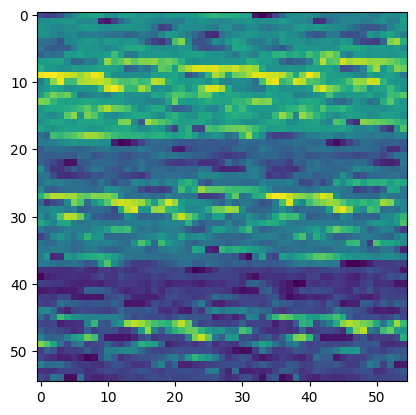

In [12]:
plt.imshow(a)

In [13]:
# this dataset sucks...

In [14]:
import keras

In [15]:
(X_train, y_train),(X_test, y_test) = keras.datasets.cifar10.load_data()

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
y_train.shape

(50000, 1)

In [18]:
y_train = y_train.reshape(-1)

In [19]:
y_test = y_test.reshape(-1)

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
# boom:

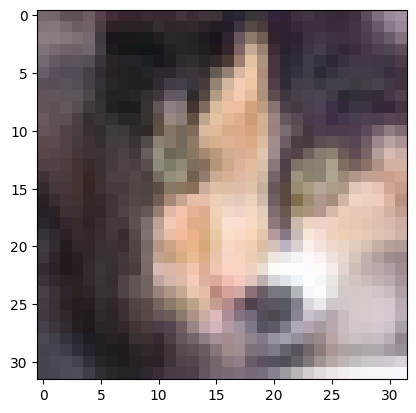

In [22]:
# showing random image from dataset
plt.imshow(X_train[np.random.randint(0, X_train.shape[0])]);

In [23]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models,layers

In [25]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")


])

In [30]:
cnn.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 67s 42ms/step - loss: 0.7485 - accuracy: 0.7396
Epoch 2/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6918 - accuracy: 0.7585
Epoch 3/20
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6360 - accuracy: 0.7776
Epoch 4/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5899 - accuracy: 0.7938
Epoch 5/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5429 - accuracy: 0.8109
Epoch 6/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5025 - accuracy: 0.8245
Epoch 7/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4603 - accuracy: 0.8384
Epoch 8/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4241 - accuracy: 0.8503
Epoch 9/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.3871 - accuracy: 0.8637
Epoch 10/20
1563/1563 [==============================] - 63s 40m

In [31]:
pred = cnn.predict(X_test)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 4s 14ms/step


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(pred, y_test)

0.6837

<img src='https://media.tenor.com/MBs2G9blS7oAAAAd/dumb-argument-idc.gif'>